# Coherent Amplitude Calculation

In theory ODE is concidered as:
$$\left[\frac{\partial}{\partial t}+\frac{1}{T_2}\right]Q(t)=\kappa_Q E_{10} E_{20}^*$$
leads to the solution by Greens' function approach:
$$Q(t)=e^{-t/T_2}\int_{-\infty}^{\infty}\kappa_Q E_{10} E_{20}^* H(t-\theta) e^{\theta/T_2}d\theta$$
where $H(t-\theta)$ is the Heaviside Step Function.

Now, Let's verify this:

1. Set a goal to change the ODEs' LHS as follows by multiplying with a integrating factor $u(t)$
$$u(t) \left[\frac{\partial}{\partial t}+\frac{1}{T_2}\right]Q(t)=\frac{\partial}{\partial t}\left[u(t) Q(t)\right]$$

this yields:
$$u(t)\frac{\partial Q(t)}{\partial t}+\frac{u(t)Q(t)}{T_2}=u(t)\frac{\partial Q(t)}{\partial t} + Q(t)\frac{\partial u(t)}{\partial t}$$
thus:
$$\frac{\partial u(t)}{\partial t}=\frac{u(t)}{T_2}$$
solution for this ODE is:
$$u(t) = e^{t/T_2}$$

2. Now, we multiply the ODE by $u(t) = e^{t/T_2}$ and achive the following result:
$$\frac{\partial}{\partial t}\left[u(t) Q(t)\right]=u(t) \kappa_Q E_{10} E_{20}^*$$
$$\frac{\partial}{\partial t}\left[e^{t/T_2} Q(t)\right]=e^{t/T_2} \kappa_Q E_{10} E_{20}^*$$

3. Integrating and considering initial condition $Q(0)=0$ and Heaviside step function, $H(t-\theta)$ to ensure no coherence before t=0:
$$\int^{t}_{0}\frac{\partial}{\partial \theta}\left[e^{\theta/T_2} Q(\theta)\right] d\theta=  \int^{t}_{0}\kappa_Q E_{10} E_{20}^*H(t-\theta)e^{\theta/T_2}d\theta$$
$$e^{t/T_2} Q(t)-Q(0)=\int^{t}_{0}\kappa_Q E_{10} E_{20}^*H(t-\theta)e^{\theta/T_2}d\theta$$
$$Q(t)=e^{-t/T_2}\int^{t}_{0}\kappa_Q E_{10} E_{20}^*H(t-\theta)e^{\theta/T_2}d\theta$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('ieee')
#plt.rcParams.update({'font.size': 14})

In [215]:
dt = 10 # fs
t = np.arange(-1500, 5000, dt) # fs
the = t # fs
T2 = [100,200] # fs
Q1 = np.zeros_like(t, dtype=complex)
Q2 = np.zeros_like(t, dtype=complex)
for i, ti in enumerate(t):
    if ti >= 0:
        Q1[i] = np.exp(-ti / T2[0])*np.sum(np.exp(the / T2[0]))*(the[1]-the[0])
        Q2[i] = np.exp(-ti / T2[1])*np.sum(np.exp(the / T2[0]))*(the[1]-the[0])

N = len(Q1)
om_fft = np.fft.fftshift(np.fft.fftfreq(N, d=dt))
Q1_fft = np.abs(np.fft.fftshift(np.fft.fft(Q1)))
Q2_fft = np.abs(np.fft.fftshift(np.fft.fft(Q2)))

tp = t
E3 = np.exp(-2*np.log(2)*tp**2/100**2)
conv1 = np.convolve(np.abs(Q1), E3, mode='full')*dt+10
conv2 = np.convolve(np.abs(Q2), E3, mode='full')*dt+10
t_conv = np.linspace(t[0]+tp[0], t[-1]+tp[-1]+dt, N+len(tp)-1)

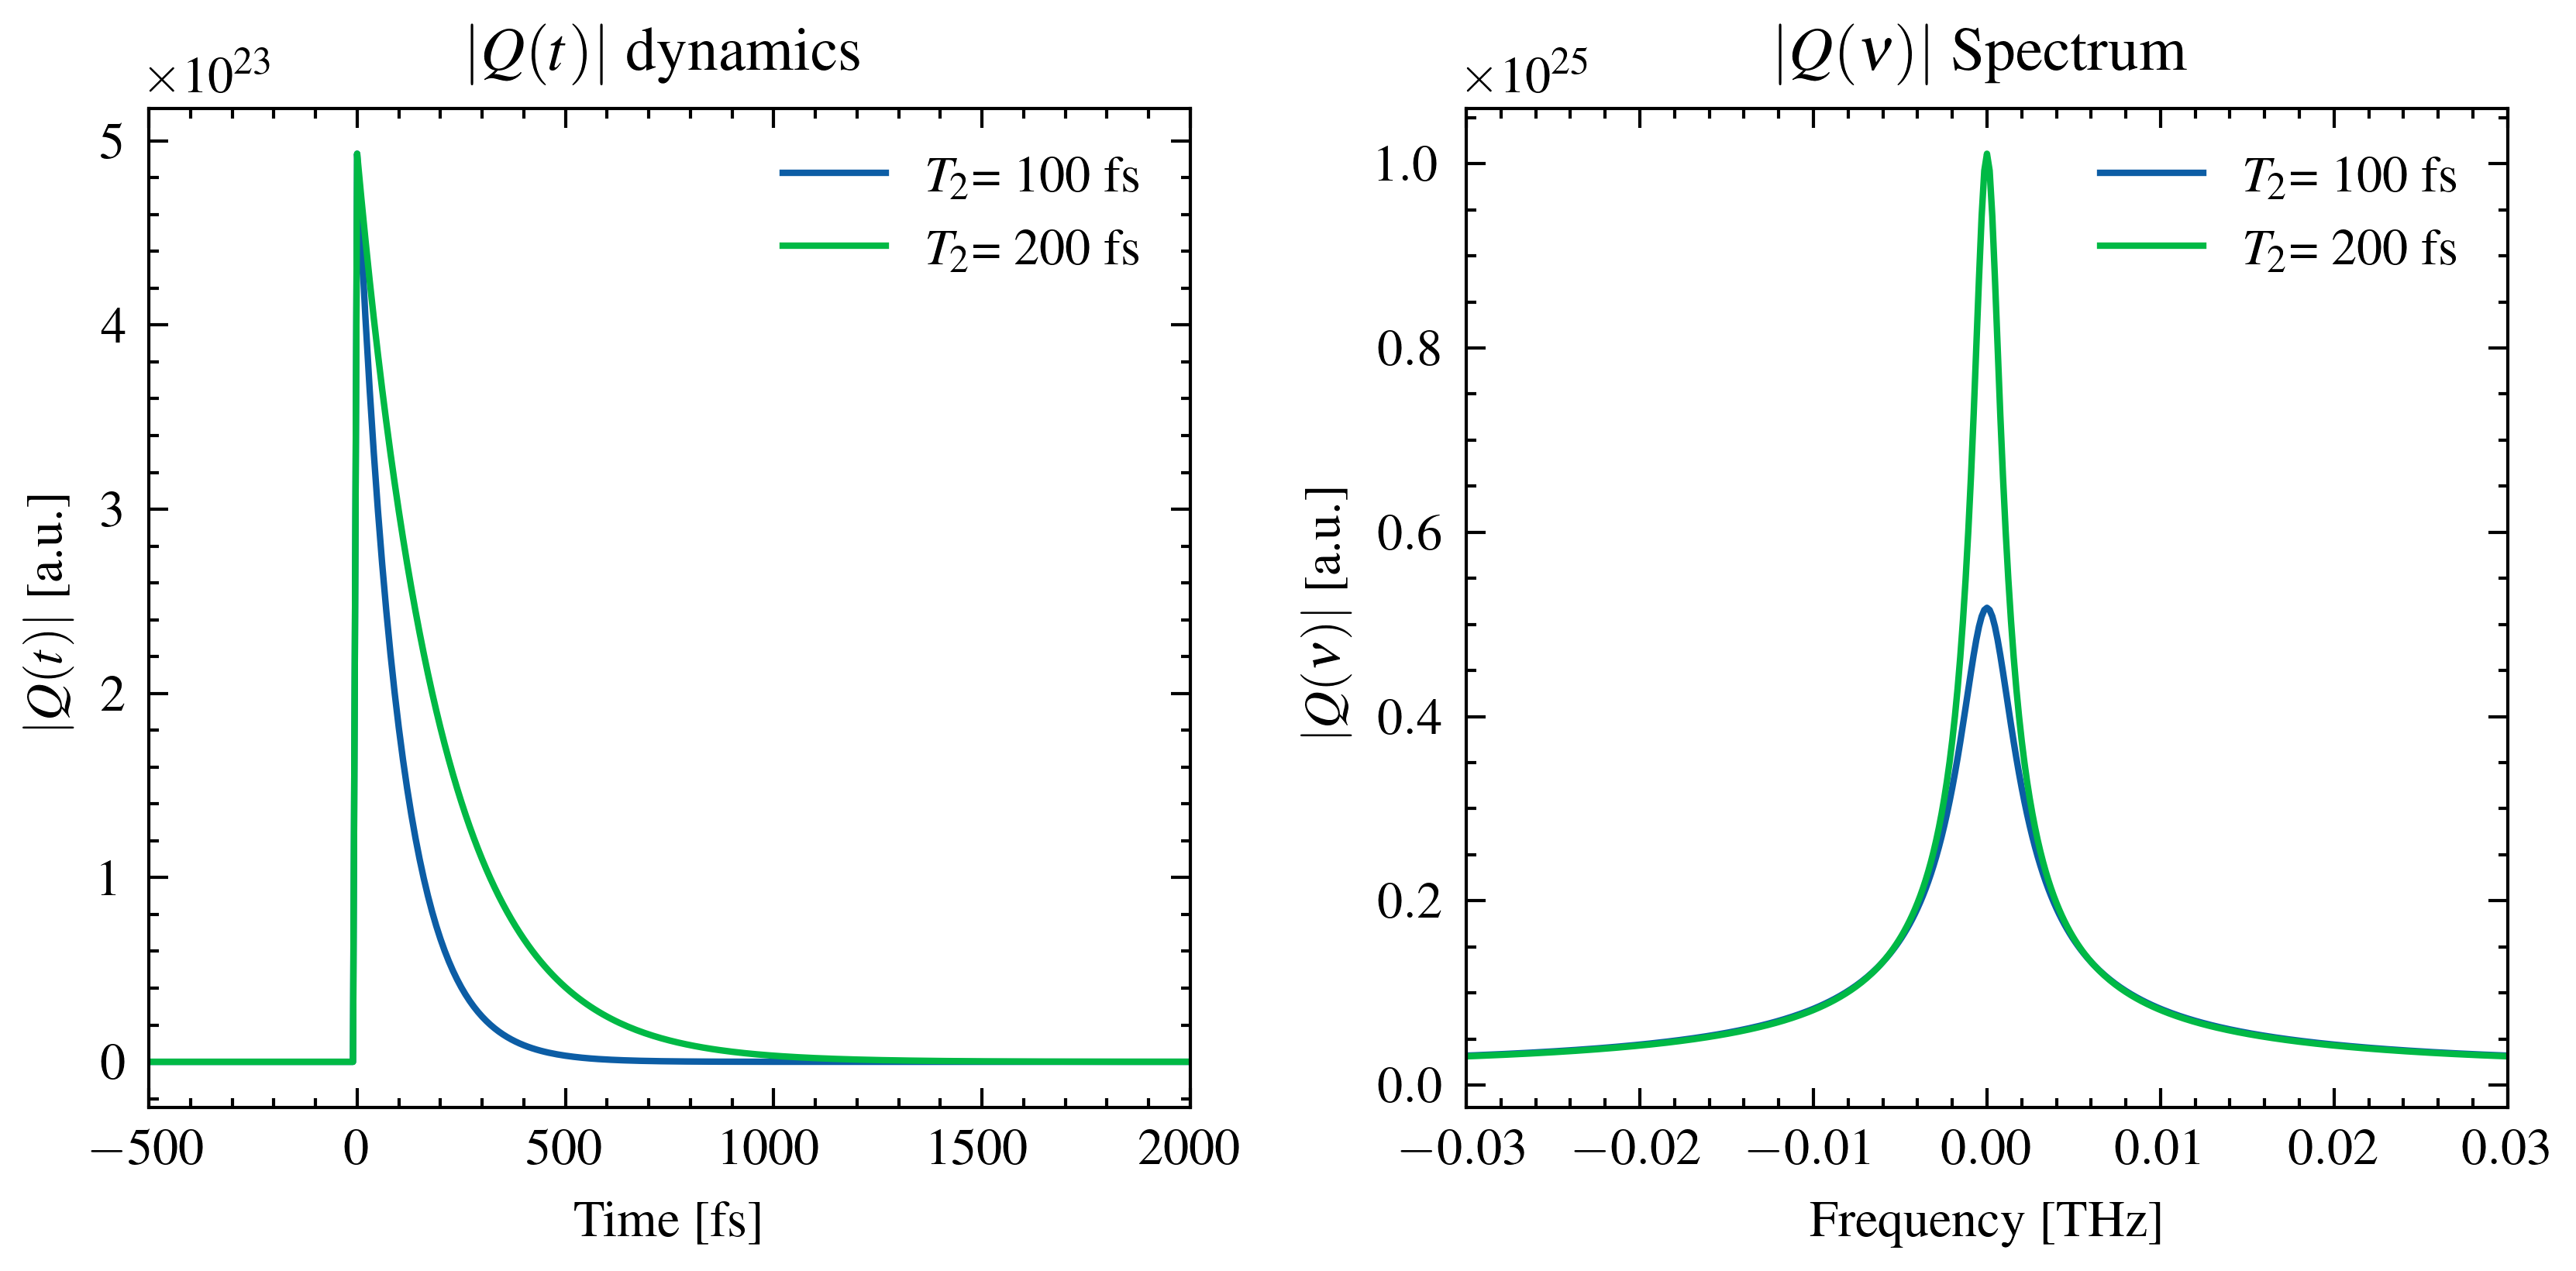

In [212]:
fig,ax = plt.subplots(1,2,figsize=(6,3))
fig.tight_layout(pad=3.0)
ax[0].plot(t, np.abs(Q1), label=r'$T_2$'+f'= {T2[0]} fs')
ax[0].plot(t, np.abs(Q2), label=r'$T_2$'+f'= {T2[1]} fs')
ax[0].set_xlim(-500, 2000)
ax[0].set_title(r'$|Q(t)|$ dynamics')
ax[0].set_xlabel('Time [fs]')
ax[0].set_ylabel(r'$|Q(t)|$ [a.u.]')
ax[0].legend()

ax[1].plot(om_fft, Q1_fft, label=r'$T_2$'+f'= {T2[0]} fs')
ax[1].plot(om_fft, Q2_fft, label=r'$T_2$'+f'= {T2[1]} fs')
ax[1].set_xlim(-0.03, 0.03)
ax[1].set_title(r'$|Q(\nu)|$ Spectrum')
ax[1].set_xlabel('Frequency [THz]')
ax[1].set_ylabel(r'$|Q(\nu)|$ [a.u.]')
ax[1].legend()
plt.show()

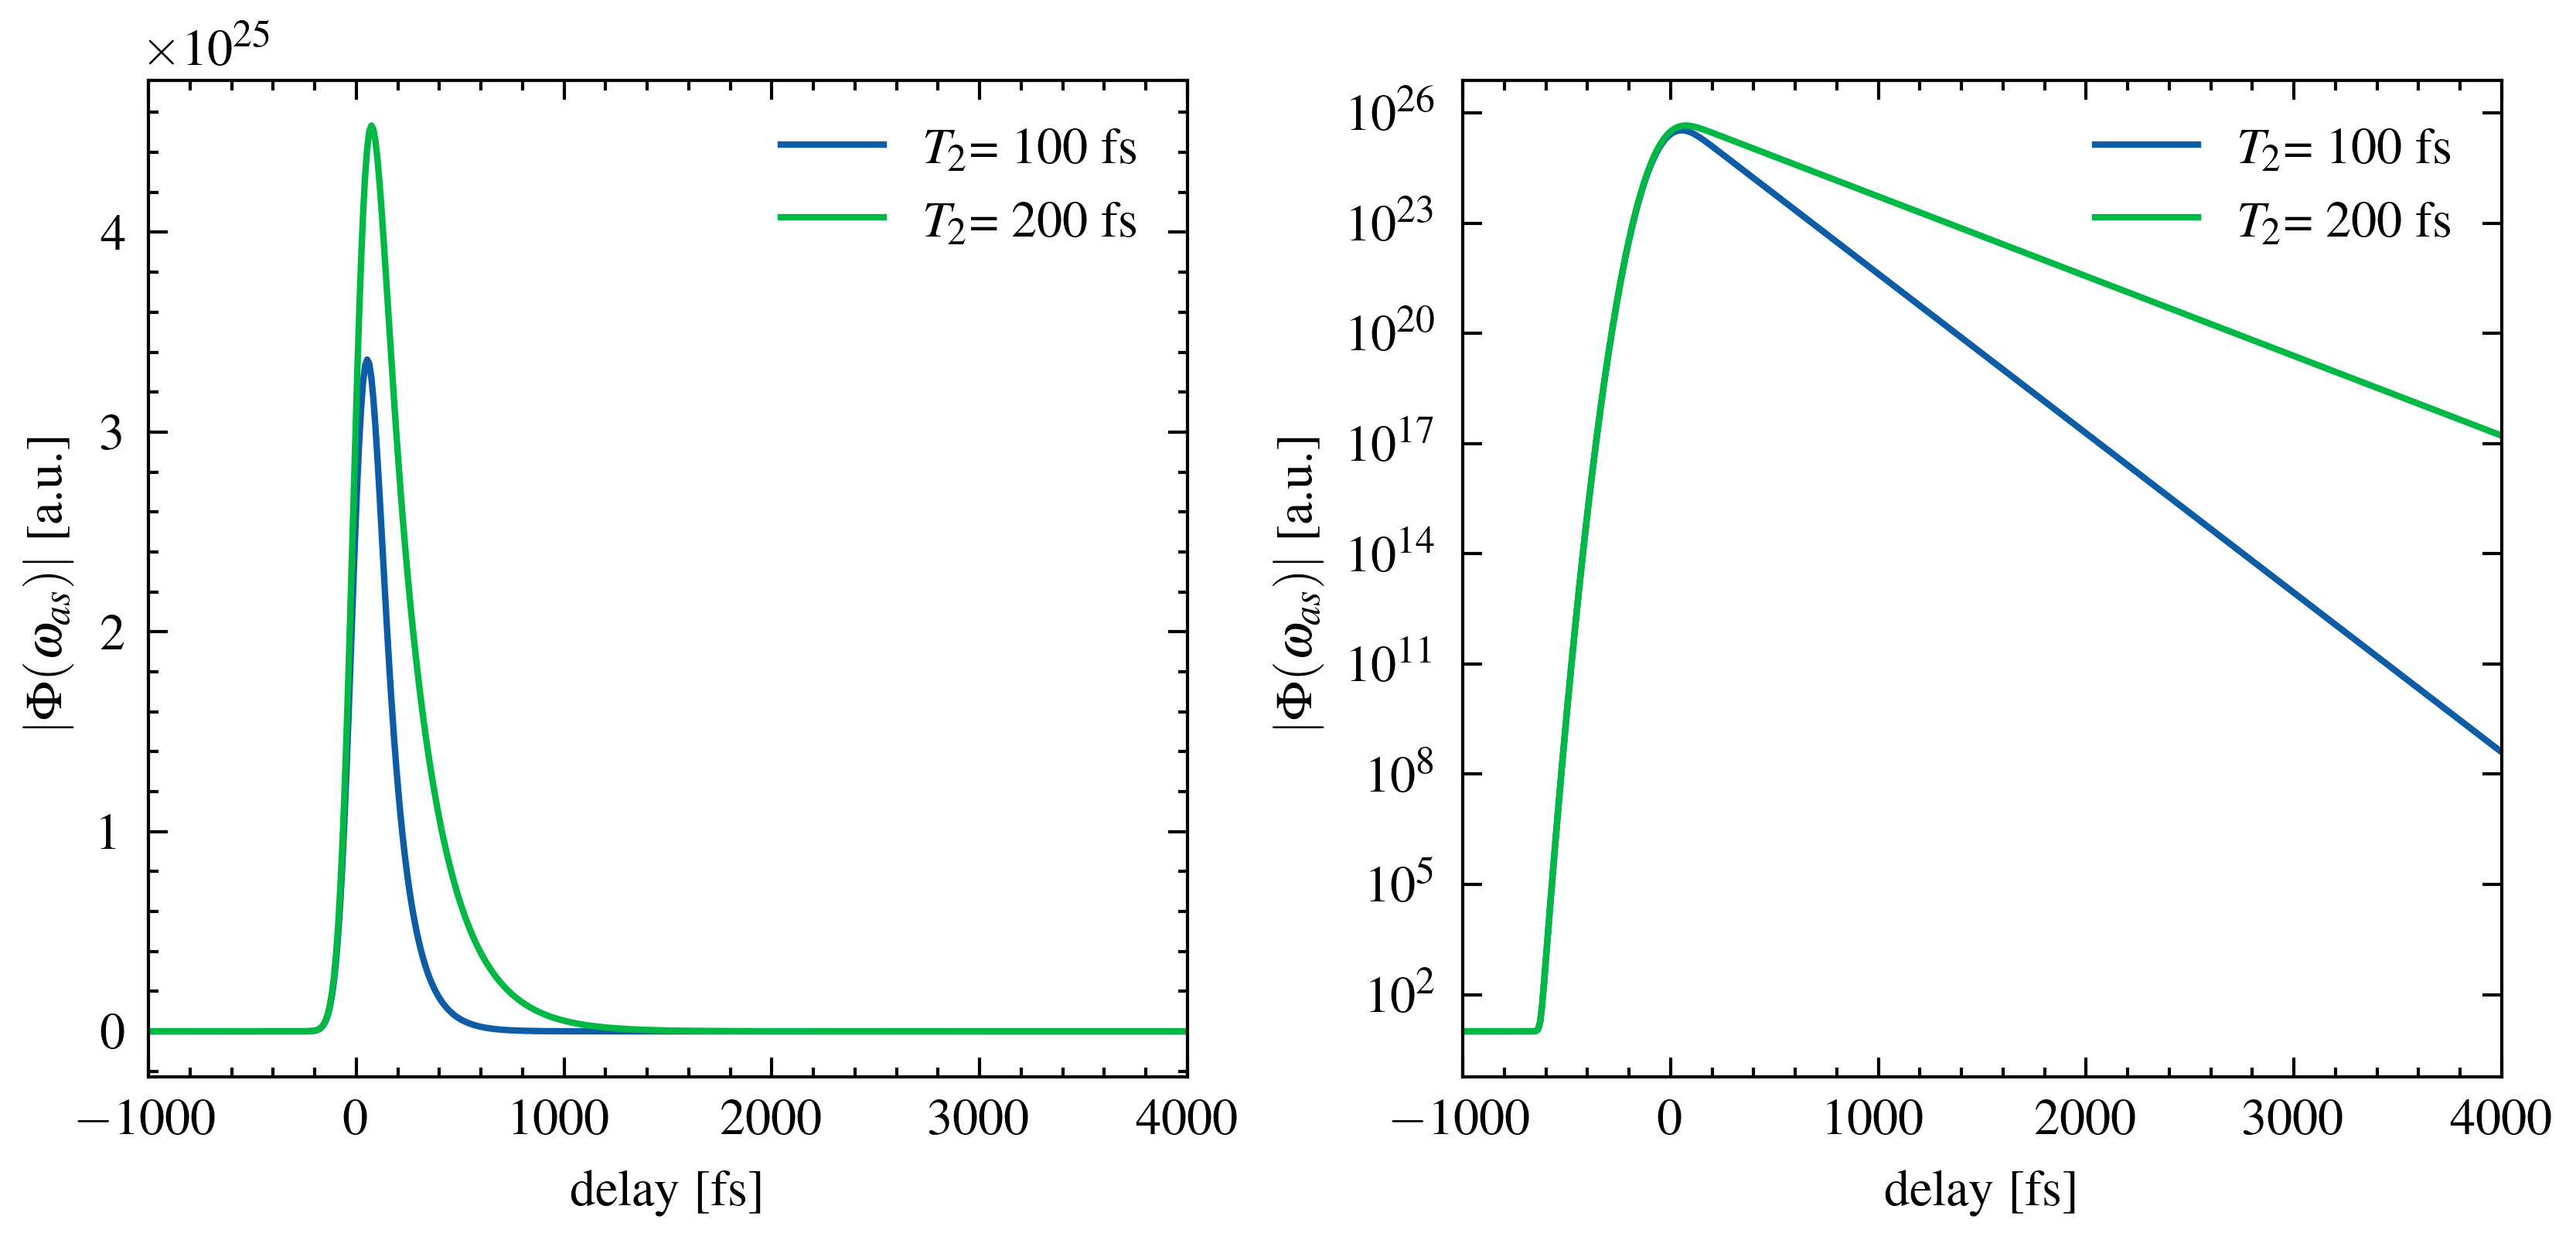

In [223]:
fig,ax = plt.subplots(1,2,figsize=(6,3))
fig.tight_layout(pad=3.0)
ax[0].plot(t_conv, conv1, label=r'$T_2$'+f'= {T2[0]} fs')
ax[0].plot(t_conv, conv2, label=r'$T_2$'+f'= {T2[1]} fs')
ax[0].set_xlim(-1000, 4000)
#ax[0].set_title(r'$|\Phi(\omega_{as})|$ dynamics')
ax[0].set_xlabel('delay [fs]')
ax[0].set_ylabel(r'$|\Phi(\omega_{as})|$ [a.u.]')
ax[0].legend()

ax[1].plot(t_conv, conv1, label=r'$T_2$'+f'= {T2[0]} fs')
ax[1].plot(t_conv, conv2, label=r'$T_2$'+f'= {T2[1]} fs')
ax[1].set_xlim(-1000, 4000)
#ax[1].set_title(r'$|\Phi(\omega_{as})|$ dynamics')
ax[1].set_xlabel('delay [fs]')
ax[1].set_ylabel(r'$|\Phi(\omega_{as})|$ [a.u.]')
ax[1].set_yscale('log')
ax[1].legend()
plt.show()

In [ ]:
Q1_fft_norm = Q1_fft/np.max(Q1_fft)
om_fft_half = [om_fft[Q1_fft_norm>=0.5][0],om_fft[Q1_fft_norm>=0.5][-1]]
del_om_fft = om_fft_half[1]-om_fft_half[0]
plt.plot(om_fft, Q1_fft_norm, label=r'$T_2$'+f'= {T2[0]} fs\n'+r'$\nu_{FWHM}$'+f'= {del_om_fft:0.2} THz')
plt.arrow(om_fft_half[0]-del_om_fft, 0.5, del_om_fft, 0, 
          length_includes_head=True, head_width=2*del_om_fft*2, head_length=del_om_fft*0.2, color='red')
plt.arrow(om_fft_half[1]+del_om_fft, 0.5, -del_om_fft, 0, 
          length_includes_head=True, head_width=2*del_om_fft*2, head_length=del_om_fft*0.2, color='red')
plt.legend()
plt.xlim(-0.03, 0.03)
plt.show()